# RMSSD analysis
This notebook was written to analyze the measurements obtained from the macro Analyze_RMSSD.py
The data can be found in '../Data/RMSSD/Result_tables/'

In [1]:
#import required packages
import pandas as pd
import numpy as np
import math
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Collect measurements from the different images analyzed
The next cell goes through all the tables, collects the results and calculates the RMSSD

In [2]:
# set the input path, were the results from the Fiji RMSSD plugin are saved
folderpath='../Data/RMSSD/Result_tables/'
# each folder contains the data from one condition, so each condition is listed 
listfolders=os.listdir(folderpath)
# create a dataframe to fil 
df_result=pd.DataFrame()
df_i=pd.DataFrame()
# reset the indexes and remove chained assignment to facilitate handling
df_i=df_i.reset_index()
pd.options.mode.chained_assignment = None

# the ventricle atrium were analyzed in the macro 
names=['ventricle','atrium']
#start a loop to work an ventricle and atrium data
for i_names in names: 
    #reset name to empty
    name=[]
    # go through all the the folders
    for folder in listfolders: 
        #empty dataframe to collect the results
        df_i=pd.DataFrame()   
        #subpath of the conditions
        filepath ='D:/doc/aernst/Heartbeat_analysis/Result_tables/'+ folder +''
        # list all files in the folder
        listfiles=os.listdir(filepath)
        # list comprehension only if atrium appears in the filename 
        indices  = [i for i in listfiles if i_names in i]
        n_numbers=len(listfiles)
        #define variable to collect data and organize next loop
        rmssd=[]
        ind=[]
        n_ind=len(indices)
        # loop through all the results tables in the folder
        for s in indices:
            #path to each result file
            filepath='D:/doc/aernst/Heartbeat_analysis/Result_tables/'+ folder +'/'+ s +''
            #read csv files
            df=pd.read_csv(filepath, sep=',')
            # sort the values by Y values, because Y represents time in kymograph
            df_sorted=df.sort_values(by='Y',ascending=False)
            df_Y=df_sorted.iloc[:,2]
            df_l=len(df_Y)
            rmssd_n=[]
            
            # go through all the Y-axis maxima locations and calculate the distance, include time 16.6 frames per s is the frame interval
            for j in range(df_l-2):
                  rmssd_i=(((df_Y.iloc[j]/16.6-df_Y.iloc[j+1]/16.6)-(df_Y.iloc[j+1]/16.6-df_Y.iloc[j+2]/16.6))*1000)**2
                  rmssd_n=np.append(rmssd_n,rmssd_i) 
            # sum up the distances between maxima, take the aveerage and calculate  the square root
            rmssd_n_sum=math.sqrt((1/(df_l-1))*sum(rmssd_n))
            # collect the results for each structure and each larva and organize them in groups
            if s == indices[0]:
                rmssd=rmssd_n_sum
                ind=s
                name=i_names
            else:
                rmssd=np.append(rmssd,rmssd_n_sum) 
                ind=np.append(ind,s)
                name=np.append(name,i_names)
            if s==indices[n_ind-1]:
                df_i["RMSSD"]=rmssd
                
                df_i["Structure"]=name
                df_i["Stage"]=ind
                
                df_i['groups']=df_i.Stage.str.replace('20161206-', str(name[1]+ "-")).str.split('-0', expand=True)[0]
                       
                df_i=df_i.drop(["Structure","Stage"],axis=1)
                df_result=pd.concat([df_result,df_i]).sort_values(by='groups',ascending=True,kind='mergesort' )
               


## Here just an example plot
The statistics and plots for the article were generated in GraphPad Prism

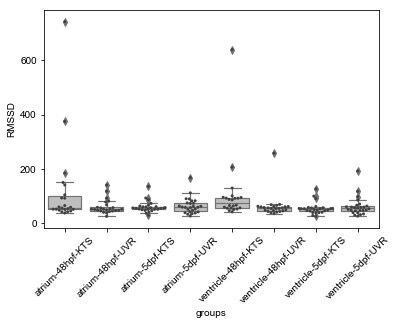

In [3]:
# plot created using the seaborn library for autamtic grouping
f =plt.plot(figsize=(20,10))
plt.xticks(rotation=45)
f =sns.set(context='paper', style='whitegrid', palette='Set2', font='Arial', font_scale=2, color_codes=True, rc=None)

f=sns.boxplot(x=df_result.groups, y=df_result.RMSSD, data=df_result, color=".75")
f= sns.swarmplot(x="groups", y=df_result.RMSSD, data=df_result, color=".25", size=3)
plt.savefig("C://Users/aernst/file.pdf", format="pdf")

In [4]:
# Manual grouping 
df_c2A=df_result[df_result['groups']=="atrium-48hpf-UVR"]
df_o2A=df_result[df_result['groups']=="atrium-48hpf-KTS"]
df_c5A=df_result[df_result['groups']=="atrium-5dpf-UVR"]
df_o5A=df_result[df_result['groups']=="atrium-5dpf-KTS"]

df_c2V=df_result[df_result['groups']=="ventricle-48hpf-UVR"]
df_o2V=df_result[df_result['groups']=="ventricle-48hpf-KTS"]

df_c5V=df_result[df_result['groups']=="ventricle-5dpf-UVR"]
df_o5V=df_result[df_result['groups']=="ventricle-5dpf-KTS"]
                                 

In [6]:
# Summary DataFrame 
# Abbreviations  c = control, number = days post fertilization, upper case letter = A -> Atrium / V -> Ventricle
df_out=pd.concat([df_c2A.RMSSD.rename("c2A"),df_o2A.RMSSD.rename("o2A"),df_c5A.RMSSD.rename("c5A"),df_o5A.RMSSD.rename("o5A"),df_c2V.RMSSD.rename("c2V"),df_o2V.RMSSD.rename("o2V"),df_c5V.RMSSD.rename("c5V"),df_o5V.RMSSD.rename("o5V")], axis=1)
df_out

,c2A,o2A,c5A,o5A,c2V,o2V,c5V,o5V
0,47.760540,46.662450,60.796192,59.669947,59.374142,62.459161,61.891707,60.240964
1,41.324960,40.833397,41.047298,35.173145,34.264847,57.814149,46.939381,52.170205
2,49.949169,40.517633,37.425346,45.658839,45.180723,128.653257,46.525810,90.040445
3,52.170205,49.782763,71.701089,49.999597,60.240964,45.119461,24.800812,54.752606
4,50.778749,54.567568,56.795725,71.785393,257.442266,65.299649,52.170205,24.096386
5,49.493002,57.370679,51.162686,51.310670,52.170205,86.601842,69.417586,37.724355
6,116.656125,63.725932,57.562234,53.350294,58.715629,54.349019,116.656125,39.040607
7,91.306251,43.703389,72.137448,58.998749,42.047135,91.306251,65.067678,26.940578
8,55.140652,36.326668,110.708379,91.446256,48.517305,53.727867,56.121968,55.574169
9,23.937332,49.517767,81.496666,62.133810,52.834820,93.429936,59.093412,46.824192


In [7]:
# Example statistics 
# The statistics here are NOT the final ones in the article
[t1,p1]=stats.kruskal(df_out['c2A'],df_out['o2A'],df_out['c5A'],df_out['o5A'],nan_policy='omit')
[t2,p2]=stats.kruskal(df_out['c5A'],df_out['o5A'],nan_policy='omit')
[t3,p3]=stats.kruskal(df_out['c2V'],df_out['o2V'],nan_policy='omit')
[t4,p4]=stats.kruskal(df_out['c5V'],df_out['o5V'],nan_policy='omit')

print("p1=",p1,"p2=",p2,"p3=",p3,"p4=",p4)  

pvals=[p1,p2,p3,p4]

p1= 0.38875960282339 p2= 0.5095888639238981 p3= 0.0042538524688338405 p4= 0.4510358974796077
